# TP1 : Linear Regression

# Q1&2 : Importing the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
from sklearn.linear_model import LinearRegression
from numpy.linalg import matrix_rank
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [3]:
df = pd.read_csv('invest.txt', sep= ' ')
df

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50
5,1973,1326.4,229.8,105.75,6.44
6,1974,1434.2,228.7,115.08,7.83
7,1975,1549.2,206.1,125.79,6.25
8,1976,1718.0,257.9,132.34,5.50
9,1977,1918.3,324.1,140.05,5.46


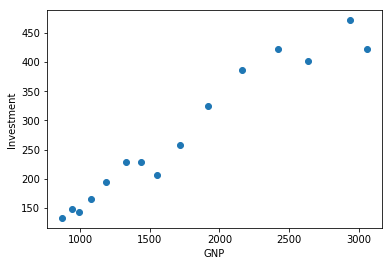

In [4]:
fig = plt.scatter(df['gnp'],df['invest'])
plt.xlabel ('GNP')
plt.ylabel('Investment')
plt.show()

# We now consider the log-Transformed values

In [5]:
df['gnp'] = df['gnp'].apply(np.log)
df['invest'] = df['invest'].apply(np.log)

In [6]:
df

,year,gnp,invest,cpi,interest
0,1968,6.772394,4.892602,82.54,5.16
1,1969,6.850126,5.005958,86.79,5.87
2,1970,6.900429,4.971201,91.45,5.95
3,1971,6.982492,5.114395,96.01,4.88
4,1972,7.078257,5.273000,100.00,4.50
5,1973,7.190224,5.437209,105.75,6.44
6,1974,7.268362,5.432411,115.08,7.83
7,1975,7.345494,5.328361,125.79,6.25
8,1976,7.448916,5.552572,132.34,5.50
9,1977,7.559195,5.781052,140.05,5.46


# Q3 : Calculating the slope, intercept, and standard deviations of the regression

In [7]:
n = df.shape[0]

x_avg = np.mean(df['gnp'])
y_avg = np.mean(df['invest'])

numerator = 0
denominator = 0

for i in range(n):
    numerator+=(df['gnp'][i]-x_avg)*(df['invest'][i]-y_avg)
    denominator+= (df['gnp'][i]-x_avg)**2
    
slope = numerator/denominator 
intercept = y_avg - slope*x_avg

intercept_sd =np.sqrt(1/(n-2)*sum(list((df['invest'][i]-(intercept+slope*df['gnp'][i]))**2 for i in range(n)))*(1/n+x_avg**2/(sum(list((df['gnp'][i]-x_avg)**2 for i in range(n))))))
slope_sd =np.sqrt(1/(n-2)*sum(list((df['invest'][i]-(intercept+slope*df['gnp'][i]))**2 for i in range(n)))/sum(list((df['gnp'][i]-x_avg)**2 for i in range(n))))
determination_coef = 1-sum(list((df['invest'][i]-(intercept+slope*df['gnp'][i]))**2 for i in range(n)))/sum(list((df['invest'][i]-y_avg)**2 for i in range(n)))
print("slope : " + str(slope))
print("intercept : " + str(intercept))
print("slope standard deviation : "+ str(slope_sd))
print("intercept standard deviation : "+ str(intercept_sd))
print("determination coefficient : " + str(determination_coef))

slope : 1.015281401598871
intercept : -1.9635913352301833
slope standard deviation : 0.055383060354852805
intercept standard deviation : 0.4095472716623082
determination coefficient : 0.9627572956057855


# Q4 : Test Statistic and p-value

In [8]:
test_val = slope/slope_sd
p_value = 2*(1-t.cdf(test_val,n-2))    #multiply by 2 as the density is symmetric
print("The p_value under the H0 hypothesis is :" + str(p_value))

The p_value under the H0 hypothesis is :1.1363709973011282e-10


# Q5 : Confidence interval for GNP = 1000

In [9]:
x = np.log(1000)
alpha = 0.1
sigma_hat = np.sqrt(1/(n-2)*sum(list((df['invest'][i]-(intercept+slope*df['gnp'][i]))**2 for i in range(n))))

def conf_interval(x):
    avg = intercept+x*slope
    var = t.ppf(1-alpha/2,n-2)*sigma_hat*np.sqrt(1/n+(x-x_avg)**2/sum(list((df['gnp'][i]-x_avg)**2 for i in range(n)))) #this is the +- term in the confidence interval
    return avg-var,avg+var
    
def pred_interval(x):
    avg = intercept+x*slope
    var = t.ppf(1-alpha/2,n-2)*sigma_hat*np.sqrt(1+1/n+(x-x_avg)**2/sum(list((df['gnp'][i]-x_avg)**2 for i in range(n)))) #this is the +- term in the prediction interval
    return avg-var,avg+var

def prediction(x):
    return intercept+x*slope


In [10]:
print('For the GNP value '+str(np.exp(x))+' the predicted Investment is : '+ str(np.exp(prediction(x))))
print('The log-based confidence interval is : [ '+ str(conf_interval(x)[0])+' ; '+str(conf_interval(x)[1])+' ] at the 90% level')
print('The log-based prediction interval is : [ '+ str(pred_interval(x)[0])+' ; '+str(pred_interval(x)[1])+' ] at the 90% level')
print('The regular confidence interval is : [ '+ str(np.exp(conf_interval(x)[0]))+' ; '+str(np.exp(conf_interval(x)[1]))+' ] at the 90% level')
print('The regular prediction interval is : [ '+ str(np.exp(pred_interval(x)[0]))+' ; '+str(np.exp(pred_interval(x)[1]))+' ] at the 90% level')


For the GNP value 999.9999999999998 the predicted Investment is : 155.97942793105466
The log-based confidence interval is : [ 4.988222845971109 ; 5.111225406662491 ] at the 90% level
The log-based prediction interval is : [ 4.882820023438679 ; 5.216628229194921 ] at the 90% level
The regular confidence interval is : [ 146.67552673421926 ; 165.87349286827552 ] at the 90% level
The regular prediction interval is : [ 132.00238933412913 ; 184.3116784508739 ] at the 90% level


# Q6 : Plot the Regression line, Prediction and Confidence Intervals

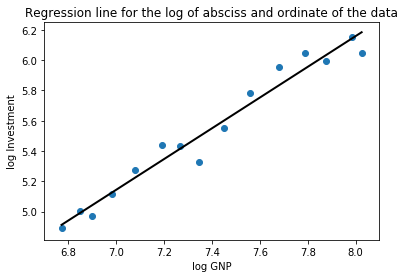

In [11]:
fig = plt.scatter(df['gnp'],df['invest'])

plt.plot([x for x in df['gnp']],[prediction(x) for x in df['gnp']], color='k', linestyle='-', linewidth=2)
plt.title('Regression line for the log of absciss and ordinate of the data')
plt.xlabel ('log GNP')
plt.ylabel('log Investment')
plt.show()

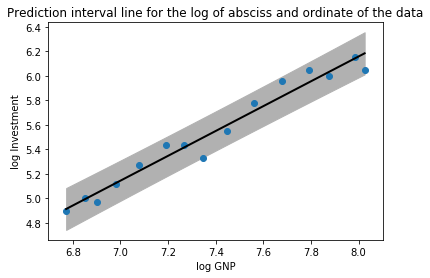

In [12]:
#interval_array = np.array([[pred_interval(x)[0] for x in df['gnp']],[pred_interval(x)[1] for x in df['gnp']]])

X = np.linspace(min(df['gnp']),max(df['gnp']),50)
Y = [prediction(x) for x in X]

plt.fill_between(X,[pred_interval(x)[0] for x in X],[pred_interval(x)[1] for x in X],color='#B1B1B1')
fig = plt.scatter(df['gnp'],df['invest'])
plt.plot([x for x in df['gnp']],[prediction(x) for x in df['gnp']], color='k', linestyle='-', linewidth=2)


#plt.plot([x for x in df['gnp']],[intercept+x*slope for x in df['gnp']], color='k', linestyle='-', linewidth=2)
             
plt.title('Prediction interval line for the log of absciss and ordinate of the data')
plt.xlabel ('log GNP')
plt.ylabel('log Investment')

plt.show()


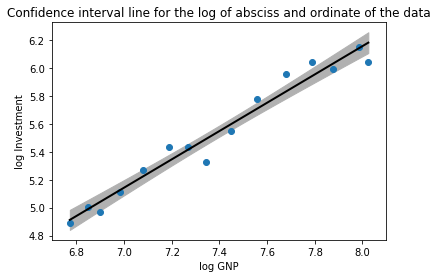

In [13]:
X = np.linspace(min(df['gnp']),max(df['gnp']),50)
Y = [prediction(x) for x in X]

plt.fill_between(X,[conf_interval(x)[0] for x in X],[conf_interval(x)[1] for x in X],color='#B1B1B1')
fig = plt.scatter(df['gnp'],df['invest'])
plt.plot([x for x in df['gnp']],[prediction(x) for x in df['gnp']], color='k', linestyle='-', linewidth=2)


#plt.plot([x for x in df['gnp']],[intercept+x*slope for x in df['gnp']], color='k', linestyle='-', linewidth=2)
             
plt.title('Confidence interval line for the log of absciss and ordinate of the data')
plt.xlabel ('log GNP')
plt.ylabel('log Investment')

plt.show()


# Q7 : Comparison with sklearn

In [14]:
reg = LinearRegression().fit([[1,df['gnp'][i]] for i in range(len(df['gnp']))],df['invest'])
print('sklearn LinearRegression gives an intercept of : '+str(reg.intercept_))
print('sklearn LinearRegression gives a slope of : '+str(reg.coef_[1]))
print('We find the same values as those calculated by hand')

sklearn LinearRegression gives an intercept of : -1.9635913352301806
sklearn LinearRegression gives a slope of : 1.0152814015988705
We find the same values as those calculated by hand


# Q8 : Coinciding plot and predicted point (red)

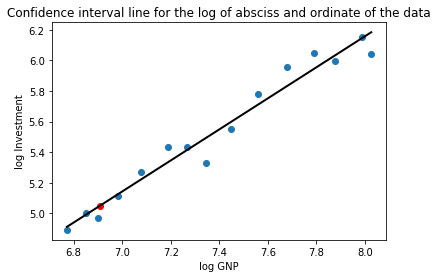

In [15]:
fig = plt.scatter(np.log(1000),reg.predict(np.array([1,np.log(1000)]).reshape(1,-1)),color='r')
plt.scatter(df['gnp'],df['invest'])
plt.plot([x for x in df['gnp']],[prediction(x) for x in df['gnp']], color='k', linestyle='-', linewidth=2)

plt.title('Confidence interval line for the log of absciss and ordinate of the data')
plt.xlabel ('log GNP')
plt.ylabel('log Investment')

plt.show()


# Q9 : Gram matrix

In [16]:
df['ones'] = pd.Series([1 for i in range(len(df['gnp']))])
X = df[['ones','gnp','interest']]


def gram_matrix(X):
    n=len(X)
    return 1/n*np.dot(np.transpose(np.matrix(X)),np.matrix(X))
M = gram_matrix(X)
M

matrix([[ 1.        ,  7.38352141,  7.45266667],
        [ 7.38352141, 54.68323179, 55.94590287],
        [ 7.45266667, 55.94590287, 62.92371333]])

In [17]:
print('The eigenvalues for the Gram Matrix are : '+ str(np.linalg.eig(M)[0]))
print('Zero is not an eigenvalue for the Gram Matrix, so the matrix is of full rank')

The eigenvalues for the Gram Matrix are : [1.15858127e+02 1.21579798e-03 2.74760242e+00]
Zero is not an eigenvalue for the Gram Matrix, so the matrix is of full rank


# Q10 : Regression Coefficient Estimation

In [18]:
gram_inverse = np.linalg.inv(np.dot(np.transpose(np.matrix(X)),np.matrix(X))) #Not exactly the gram inverse, as the 1/n factor is not taken into account

projector = np.dot(np.transpose(np.matrix(X)),np.transpose(np.matrix(df['invest'])))

parameters = np.dot(gram_inverse,projector)



In [19]:
beta0 = float(parameters[0])
beta1 = float(parameters[1])
beta2 = float(parameters[2])
print('The estimated parameters are : ')
print('beta0 = '+str(beta0))
print('beta1 = '+str(beta1))
print('beta2 = '+str(beta2))


The estimated parameters are : 
beta0 = -2.1804547259122273
beta1 = 1.0512426913197572
beta2 = -0.006528879406090482


In [20]:
sigma_hat = float(np.sqrt(1/(n-3)*sum([(df['invest'][i]-np.dot(X,parameters)[i])**2 for i in range(n)])))
C = sigma_hat**2*gram_inverse

In [21]:
print('The standard deviation for beta0 is : '+str(np.sqrt(C[0,0])))
print('The standard deviation for beta1 is : '+str(np.sqrt(C[1,1])))
print('The standard deviation for beta2 is : '+str(np.sqrt(C[2,2])))


The standard deviation for beta0 is : 0.6623991977962096
The standard deviation for beta1 is : 0.1020613780618984
The standard deviation for beta2 is : 0.015344205065601697


In [22]:
determination_coef = 1-sum([(df['invest'][i]-np.dot(X,parameters)[i])**2 for i in range(n)])/sum([(df['invest'][i]-y_avg)**2 for i in range(n)])

print('The determination coefficient is : '+ str(float(determination_coef)))

The determination coefficient is : 0.9633108306726244


Statistical Tests

In [30]:
test_val = beta0/np.sqrt(C[0,0])
p_value = 2*(1-t.cdf(np.abs(test_val),n-3))    #multiply by 2 as the density is symmetric
print("The p_value under the H0 hypothesis for parameter beta0 is :" + str(p_value))

test_val = beta1/np.sqrt(C[1,1])
p_value = 2*(1-t.cdf(np.abs(test_val),n-3))    #multiply by 2 as the density is symmetric
print("The p_value under the H0 hypothesis for parameter beta1 is :" + str(p_value))

test_val = beta2/np.sqrt(C[2,2])
p_value = 2*(1-t.cdf(np.abs(test_val),n-3))    #multiply by 2 as the density is symmetric
print("The p_value under the H0 hypothesis for parameter beta2 is :" + str(p_value))
print("We cannot reject this hypothesis for beta2")

The p_value under the H0 hypothesis for parameter beta0 is :0.0064383670509107205
The p_value under the H0 hypothesis for parameter beta1 is :2.5995168484449493e-07
The p_value under the H0 hypothesis for parameter beta2 is :0.6780071418827931
We cannot reject this hypothesis for beta2


In [25]:
test_val

-0.4254947961251366

# Q11 : Prediction using our new model

In [26]:
gnp = np.log(1000)
interest = 10
prediction = beta0+beta1*gnp+beta2*interest
print('Our log-based prediction is : '+ str(prediction))
print('Which amounts to an invest of : '+ str(np.exp(prediction)))

Our log-based prediction is : 5.01598373048231
Which amounts to an invest of : 150.8044147208148


In [27]:
alpha = 0.001

def conf_interval(gnp,interest):
    x = np.matrix([1,gnp,interest])
    avg = np.dot(x,parameters)[0,0]
    var = t.ppf(1-alpha/2,n-3)*np.sqrt(sigma_hat**2*float(np.dot(np.dot(x,gram_inverse),np.transpose(x))))
    return avg-var,avg+var
    
def pred_interval(gnp,interest):
    x = np.matrix([1,gnp,interest])
    avg = np.dot(x,parameters)[0,0]
    var = t.ppf(1-alpha/2,n-3)*np.sqrt(sigma_hat**2*(1+float(np.dot(np.dot(x,gram_inverse),np.transpose(x)))))
    return avg-var,avg+var

def prediction(gnp,invest):
    x = np.matrix([1,gnp,interest])
    avg = np.dot(x,parameters)[0,0]
    return avg


In [28]:
print('For the GNP value '+str(gnp)+' the predicted Investment is : '+ str(prediction(gnp,interest)))
print('The log-based confidence interval is : [ '+ str(conf_interval(gnp,interest)[0])+' ; '+str(conf_interval(gnp,interest)[1])+' ] at the 99.9% level')
print('The log-based prediction interval is : [ '+ str(pred_interval(gnp,interest)[0])+' ; '+str(pred_interval(gnp,interest)[1])+' ] at the 99.9% level')


For the GNP value 6.907755278982137 the predicted Investment is : 5.01598373048231
The log-based confidence interval is : [ 4.640184036687788 ; 5.391783424276832 ] at the 99.9% level
The log-based prediction interval is : [ 4.473803343639947 ; 5.558164117324672 ] at the 99.9% level


# Q12 : Plot the Data

<IPython.core.display.Javascript object>


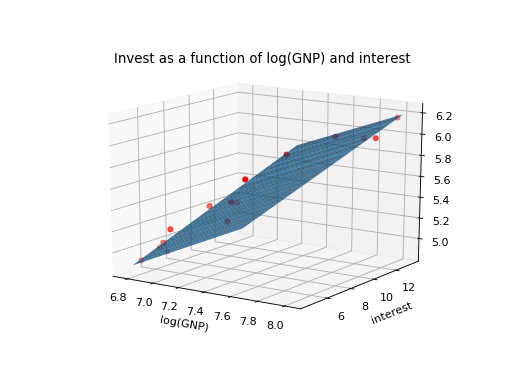

Text(0.5,0.92,'Invest as a function of log(GNP) and interest')

In [34]:
l =100
xx , yy = np.meshgrid(np.linspace(min(df['gnp']),max(df['gnp']),l),np.linspace(min(df['interest']),max(df['interest']),l))

zz = np.zeros((l,l))
for i in range(xx.shape[0]):
    for j in range(yy.shape[1]):
        zz[i, j] = prediction(xx[i,j],yy[i,j])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['gnp'],df['interest'],df['invest'],c='red')
ax.plot_surface(xx,yy,zz)
plt.xlabel('log(GNP)')
plt.ylabel('interest')
plt.title('Invest as a function of log(GNP) and interest')



99.9% Confidence Intervals for Invest as a function of log(GNP) and interest

Text(0.5,0.92,'99.9% Confidence intervals')

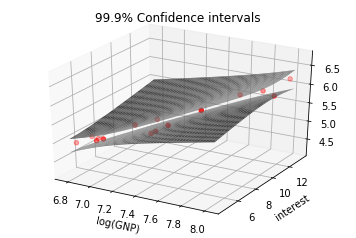

In [30]:
l =100
xx , yy = np.meshgrid(np.linspace(min(df['gnp']),max(df['gnp']),l),np.linspace(min(df['interest']),max(df['interest']),l))

zz_down = np.zeros((l,l))
for i in range(xx.shape[0]):
    for j in range(yy.shape[1]):
        zz_down[i, j] = conf_interval(xx[i,j],yy[i,j])[0]

zz_up = np.zeros((l,l))
for i in range(xx.shape[0]):
    for j in range(yy.shape[1]):
        zz_up[i, j] = conf_interval(xx[i,j],yy[i,j])[1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['gnp'],df['interest'],df['invest'],c='red')
ax.plot_surface(xx,yy,zz_down,color='grey')
ax.plot_surface(xx,yy,zz_up,color='grey')

plt.xlabel('log(GNP)')
plt.ylabel('interest')
plt.title('99.9% Confidence intervals')



99.9% Prediction Intervals for Invest as a function of log(GNP) and interest

Text(0.5,0.92,'99.9% Prediction intervals')

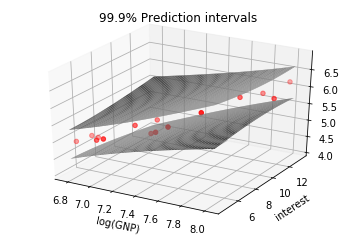

In [31]:
l =100
xx , yy = np.meshgrid(np.linspace(min(df['gnp']),max(df['gnp']),l),np.linspace(min(df['interest']),max(df['interest']),l))

zz_down = np.zeros((l,l))
for i in range(xx.shape[0]):
    for j in range(yy.shape[1]):
        zz_down[i, j] = pred_interval(xx[i,j],yy[i,j])[0]

zz_up = np.zeros((l,l))
for i in range(xx.shape[0]):
    for j in range(yy.shape[1]):
        zz_up[i, j] = pred_interval(xx[i,j],yy[i,j])[1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['gnp'],df['interest'],df['invest'],c='red')
ax.plot_surface(xx,yy,zz_down,color='grey')
ax.plot_surface(xx,yy,zz_up,color='grey')

plt.xlabel('log(GNP)')
plt.ylabel('interest')
plt.title('99.9% Prediction intervals')



# Q13 : Compare with LinearRegression

In [32]:
reg = LinearRegression().fit([[1,df['gnp'][i],df['interest'][i]] for i in range(len(df['gnp']))],df['invest'])
print('sklearn LinearRegression gives an intercept of : '+str(reg.intercept_))
print('sklearn LinearRegression gives a beta1 of : '+str(reg.coef_[1]))
print('sklearn LinearRegression gives a beta2 of : '+str(reg.coef_[2]))

print('We find the same values as those calculated by hand')

sklearn LinearRegression gives an intercept of : -2.1804547259114013
sklearn LinearRegression gives a beta1 of : 1.0512426913196595
sklearn LinearRegression gives a beta2 of : -0.0065288794060684874
We find the same values as those calculated by hand
